In [26]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy
from matplotlib.ticker import FormatStrFormatter

In [2]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

In [46]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [44]:
def read_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200,k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQueryOfflineNew/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [5]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "gt/single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

In [15]:
def prepare_testing_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "gt/single_window_randk_gt_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [8]:
def prepare_testing_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, k=5000):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [61]:
def prepare_profiler_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200,k=5000):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [64]:
def prepare_profiler_offline_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200,k=5000):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"gt/single_window_randk_gt_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [10]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [11]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [12]:
def get_sum_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    # avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [13]:
def get_fsd_dict(dataset):
    fsd = {}
    with open(dataset, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            fsd[int(items[0])] = int(items[1])
    
    sorted_fsd = dict(sorted(list(fsd.items())))
    
    return sorted_fsd

In [14]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}

In [50]:
def plot_gt_fsd_with_diff_mem(dataset, widths):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    file_path = pcap_folder + dataset[:-9] + '.txt'
    all_fsd['GT'] = get_fsd_dict(file_path)
    
    # for w in widths:
    #     fsds = read_single_window_gt_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
    #                                                 epochs=['10'], dataset=dataset, window_size=200)
    #     all_fsd[f'Mem={int(w*16/1024)}KB-GT'] = get_avg_fsd(fsds)
    
    for w in widths:
        fsds = read_single_window_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=dataset, window_size=200, k=5000)
        all_fsd[f'Mem={int(w*16/1024)}KB'] = get_avg_fsd(fsds)
        
    fsds = read_single_window_gt_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
                                                epochs=['10'], dataset=dataset, window_size=200)
    all_fsd[f'Mem=INF'] = get_avg_fsd(fsds)
        
    
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=(3 if labels[i][-2:]=='GT' else 2), linestyle=("--" if labels[i][-2:]=='GT' else "-"))
    plt.title(f'CDF of {dataset[:-9]}', fontsize=20)
    plt.xlabel('Flow Size', fontsize=18)
    plt.ylabel('Cumulative Probability', fontsize=18)
    plt.legend(loc="lower right", ncol=1, fontsize=16)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.ylim([-0.05,1.05])
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000], size=16)  # Set specific tick positions
    plt.yticks(size=16)
    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

/tmp/ipykernel_30687/3991467798.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


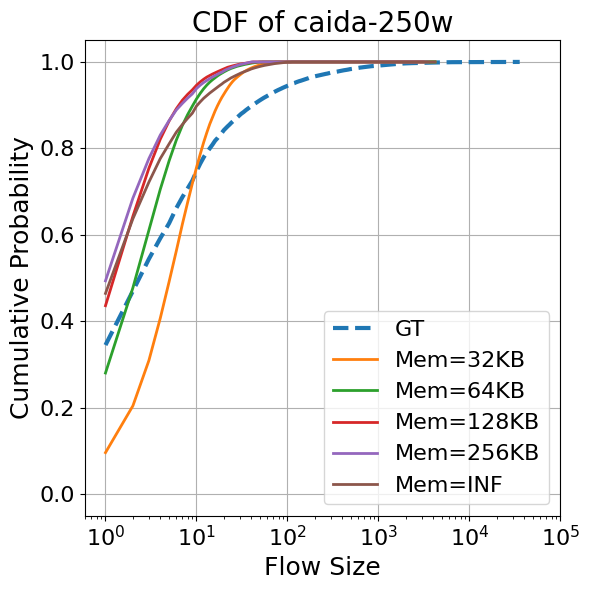

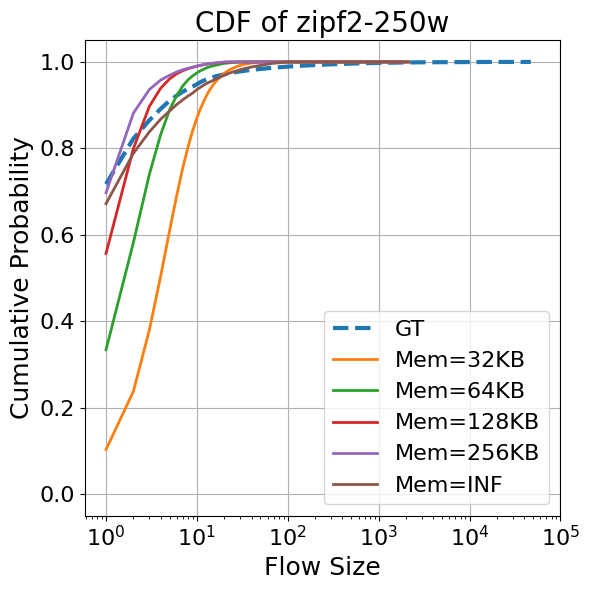

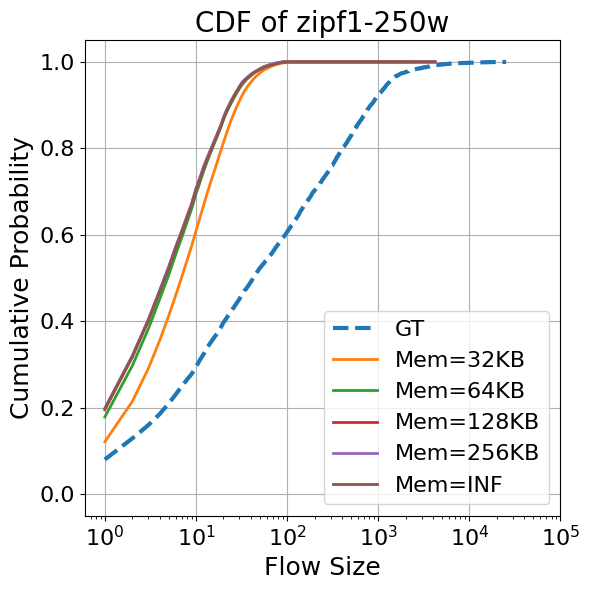

In [51]:
# for i in range(10):
#     plot_gt_fsd_with_diff_mem(dataset=pcap_file[i], widths=[1024, 2048, 4096, 8192, 16384])

plot_gt_fsd_with_diff_mem(dataset=pcap_file[1], widths=[2048, 4096, 8192, 16384])
plot_gt_fsd_with_diff_mem(dataset=pcap_file[4], widths=[2048, 4096, 8192, 16384])
plot_gt_fsd_with_diff_mem(dataset=pcap_file[7], widths=[2048, 4096, 8192, 16384])

# plot_gt_fsd_with_diff_mem(dataset=pcap_file[2], widths=[1024, 2048, 4096, 8192, 16384])
# plot_gt_fsd_with_diff_mem(dataset=pcap_file[5], widths=[1024, 2048, 4096, 8192, 16384])
# plot_gt_fsd_with_diff_mem(dataset=pcap_file[8], widths=[1024, 2048, 4096, 8192, 16384])

# plot_gt_fsd_with_diff_mem(dataset=pcap_file[3], widths=[1024, 2048, 4096, 8192, 16384])
# plot_gt_fsd_with_diff_mem(dataset=pcap_file[6], widths=[1024, 2048, 4096, 8192, 16384])
# plot_gt_fsd_with_diff_mem(dataset=pcap_file[9], widths=[1024, 2048, 4096, 8192, 16384])
    

In [39]:
def plot_gt_mrd_with_diff_mem(datasets, widths):
    
    testing_fsd = {}
    testing_gt_avg_fsd = {}
    
    # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    
    # prepare testing avg fsd
    for w in widths:
        testing_fsd[w] = {}
        testing_fsd[w] = prepare_testing_fsd_data(datasets=datasets, width=w)
            
    # prepare testing gt avg fsd
    testing_fsd[0] = {}
    testing_fsd[0] = prepare_testing_gt_fsd_data(datasets=datasets, width=4096)
    
    xticks = [f'{int(w*16/1024)}KB' for w in widths] + ['INF']
        
    MRDs = []
    # cal by avg mrd
    for d in datasets:
        single_MRDs = []
        GT_fsd = get_fsd_dict(pcap_folder+d[:-9]+'.txt')
        # testing
        for w in widths:
            total_mrd = 0.0
            for fsd in testing_fsd[w][d[:-9]]:
                total_mrd += calculate_mrd(normalize_fsd(GT_fsd), normalize_fsd(fsd))
            single_MRDs.append(round(total_mrd/len(testing_fsd[w][d[:-9]]), 2))
        # GT
        total_mrd = 0.0
        for fsd in testing_fsd[0][d[:-9]]:
            total_mrd += calculate_mrd(normalize_fsd(GT_fsd), normalize_fsd(fsd))
        single_MRDs.append(round(total_mrd/len(testing_fsd[0][d[:-9]]), 2))
        
        MRDs.append(single_MRDs)
        
    labels = list(testing_fsd[widths[0]].keys())
    # colors = {'caida':'tab:green', 'zipf2': 'tab:orange', 'zipf1':'tab:blue'}
    colors = {'500w':'tab:red', '250w':'tab:green', '125w':'tab:orange', '50w':'tab:blue'}
    markers = {'500w':'o', '250w':'^', '125w':'s', '50w':'D'}
    legend_loc = ['lower left', 'upper right', 'upper right']
    data_range = [(7,10), (0,4), (4,7)] # zipf1 caida zipf2
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    bar_width = 0.2
    for i, ax in enumerate(axs):
        ax.set_title(f'{labels[data_range[i][0]].split("-")[0]}', fontsize=18)
        for j in range(data_range[i][0], data_range[i][1]):
        #     ax.plot(MRDs[j], label=labels[j], color=colors[labels[j].split("-")[1]], marker=markers[labels[j].split("-")[1]], linewidth=3, markersize=8)
        # ax.set_xticks(np.arange(len(xticks)))
        # ax.legend(fontsize=16)
            offset = (j - data_range[i][0]) * bar_width
            ax.bar(np.arange(len(xticks)) + offset, MRDs[j], width=bar_width, label=labels[j],
               color=colors[labels[j].split("-")[1]], edgecolor='black', zorder=3)
        ax.set_xticks(np.arange(len(xticks)) + bar_width * (len(range(data_range[i][0], data_range[i][1])) - 1) / 2)
        ax.legend(loc=legend_loc[i], fontsize=16)
    
        ax.set_xticklabels(xticks)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.grid(zorder=0)
    
    fig.text(0.5, -0.02, 'Memory', ha='center', fontsize=18)
    fig.text(-0.01, 0.5, 'WMRD(DIST_sketch, DIST_gt)', va='center', rotation='vertical', fontsize=18)
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.suptitle('WMRD Variation between Sketch-FSD and GT-FSD', fontsize=20)
    
    plt.tight_layout()
    plt.show()  
    

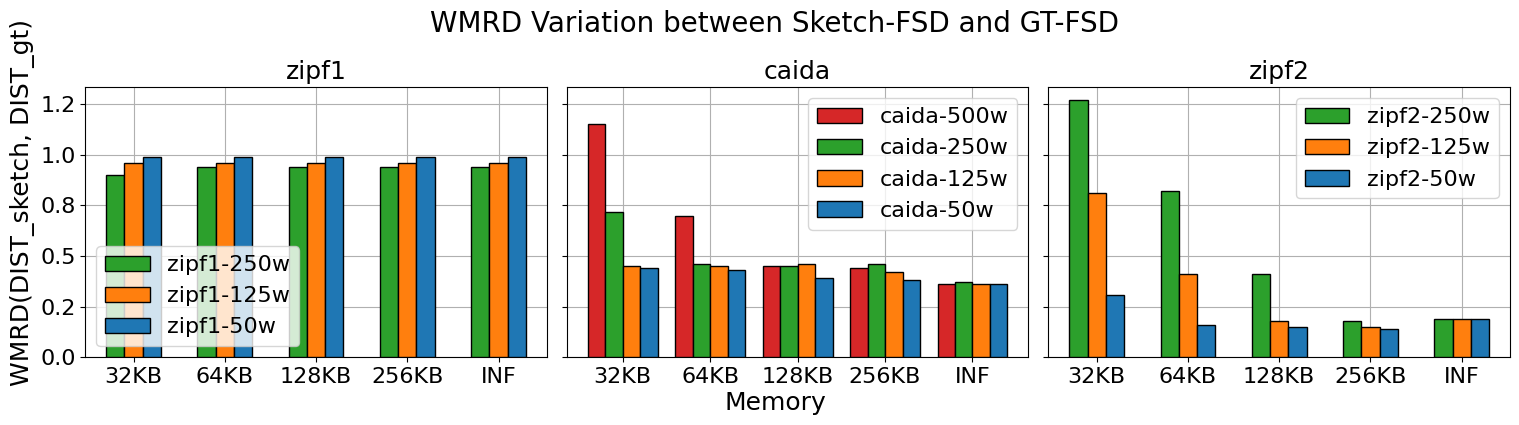

In [40]:
plot_gt_mrd_with_diff_mem(datasets=pcap_file[:10], widths=[2048, 4096, 8192, 16384])

---

In [58]:
def plot_dirty_fsd_with_diff_mem():
    
    tfss = ["250w", "125w", "50w"]
    datasets = ['zipf1', 'caida', 'zipf2']
    # colors = {'caida':'tab:green', 'zipf2': 'tab:orange', 'zipf1':'tab:blue'}
    colors = {'GT':'tab:green', 'Dirty':'tab:orange', 'Sketch':'tab:blue'}
    linestyles = {'GT':'-', 'Dirty':'--', 'Sketch':':'}
    width = 4096
    
    for tfs in tfss:
    
        fs = []
        prob = []
        cdfs = []
        labels = []
        all_fsd = {}

        pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
        for d in datasets:
            # Prepare origin fsd
            file_path = pcap_folder + (d+'-'+tfs) + '.txt'
            all_fsd[f'{d}-GT'] = get_fsd_dict(file_path)
            
            dirty_fsds = read_offline_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=(d+"-"+tfs+"_10_.pcap"), window_size=200, k=5000)
            all_fsd[f'{d}-Dirty'] = get_avg_fsd(dirty_fsds)
            
            fsds = read_single_window_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
                                                        epochs=['10'], dataset=(d+"-"+tfs+"_10_.pcap"), window_size=200,k=5000)
            all_fsd[f'{d}-Sketch'] = get_avg_fsd(fsds)
        
    
        for name, fsd in all_fsd.items(): 
            flow_size = list(fsd.keys())
            frequency = list(fsd.values()) 

            total_flows = sum(frequency)
            probabilities = [freq / total_flows for freq in frequency]
            
            cdf = np.cumsum(probabilities)
            
            fs.append(flow_size)
            prob.append(probabilities)
            cdfs.append(cdf)
            labels.append(name)
            
            
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        for i, ax in enumerate(axs):
            ax.set_title(f'{datasets[i]}-{tfs}', fontsize=18)
            for j in range(3*i, 3*i+3):
                ax.plot(fs[j], cdfs[j], label=labels[j], color=colors[labels[j].split("-")[1]], linewidth=5, alpha=0.8, linestyle=linestyles[labels[j].split("-")[1]])
            ax.set_xscale('log')
            ax.set_xlim([-10,100000])
            
            ax.set_xticks([1, 10, 100, 1000, 10000, 100000])
            ax.set_xticklabels([1, 10, 100, 1000, 10000, 100000])
            ax.xaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_tick_params(labelsize=16)
            ax.grid()
            ax.legend(ncol=1, loc='lower right', fontsize=16)
        
        fig.text(0.5, -0.02, 'Flow Size', ha='center', fontsize=18)
        fig.text(-0.01, 0.5, 'Cumulative Probability', va='center', rotation='vertical', fontsize=18)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'CDF between Sketch-FSD, Dirty-FSD and GT-FSD (MEM={int(width*4*4/1024)}KB)', fontsize=20)
        
        plt.tight_layout()
        plt.show()  
     
        

/tmp/ipykernel_30687/578204544.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([-10,100000])


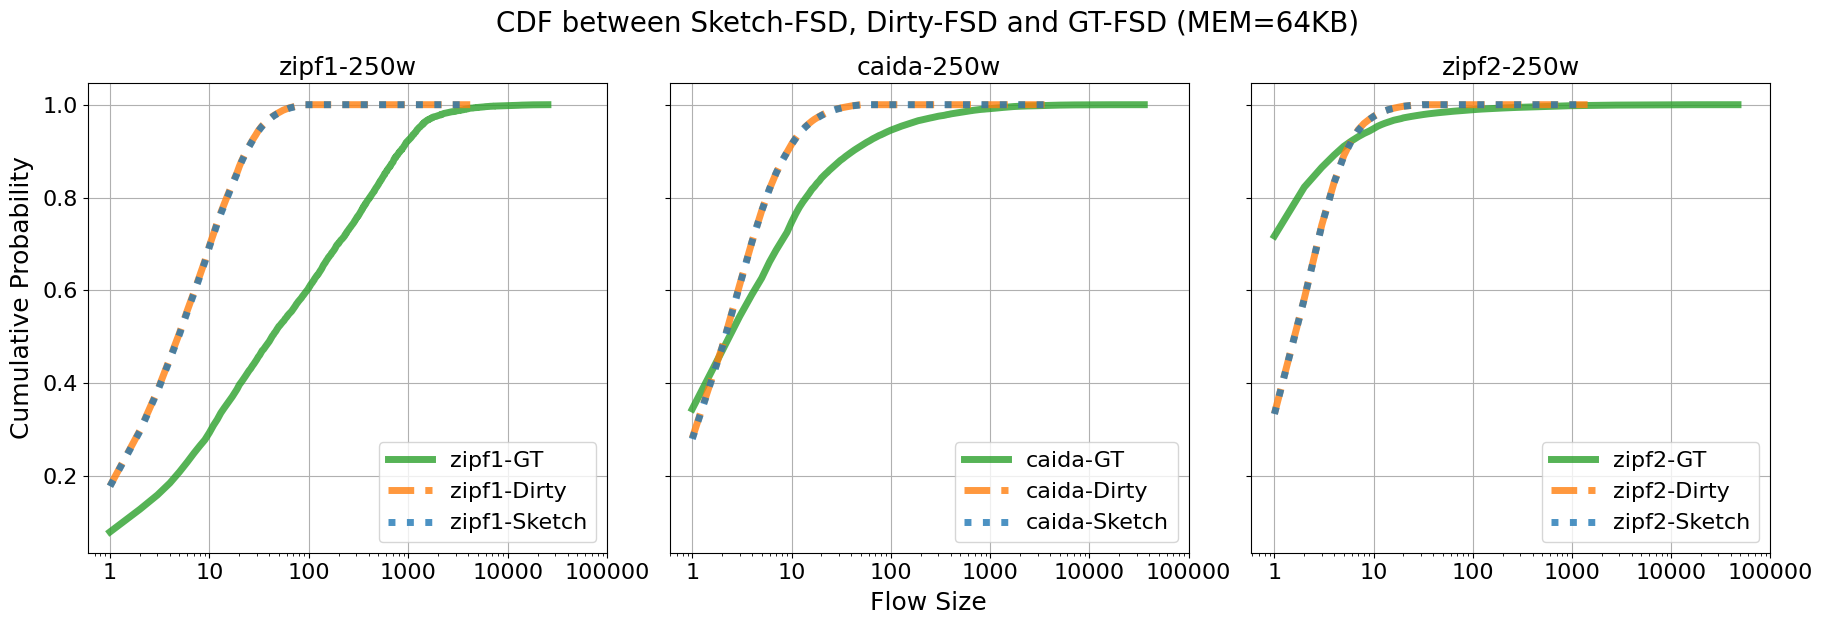

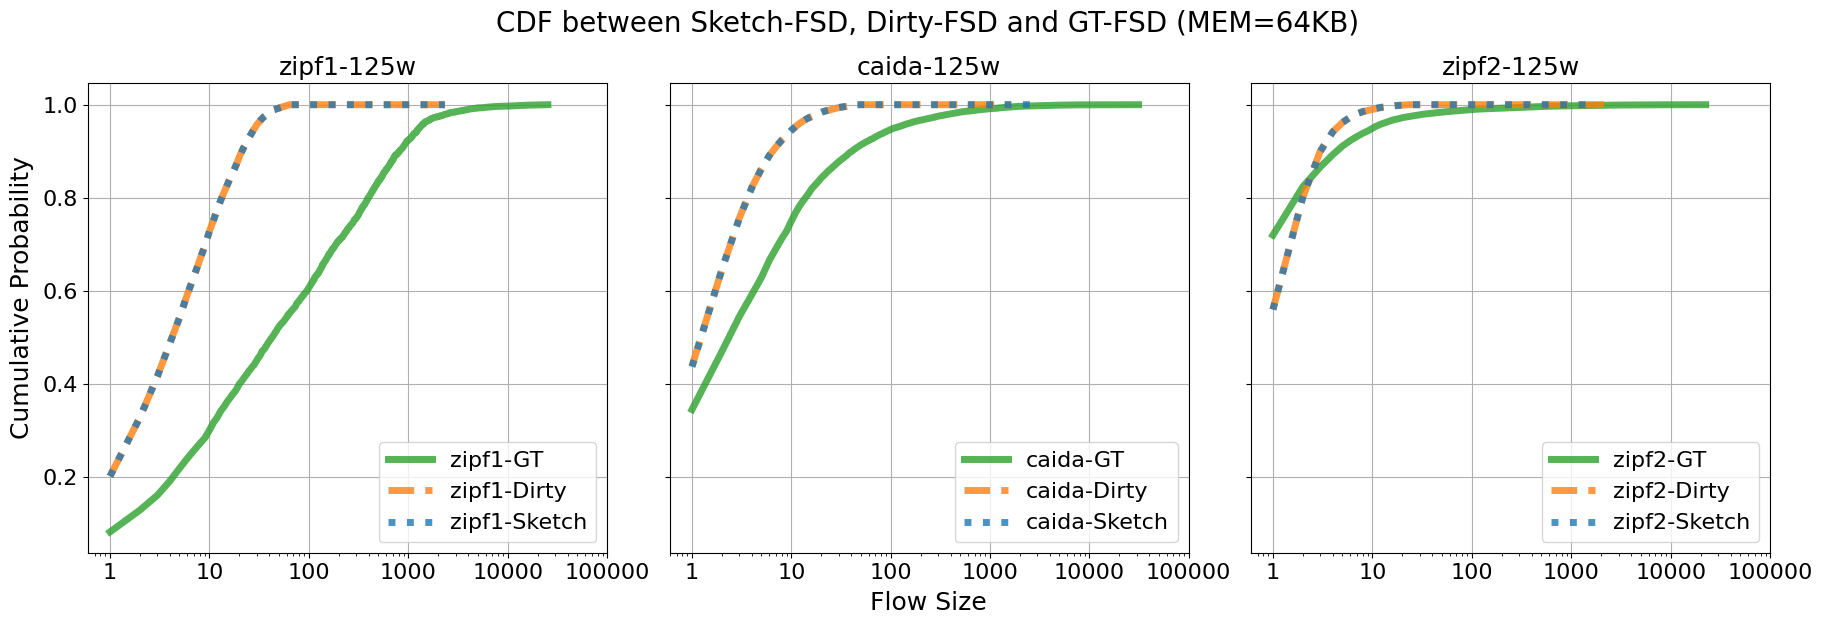

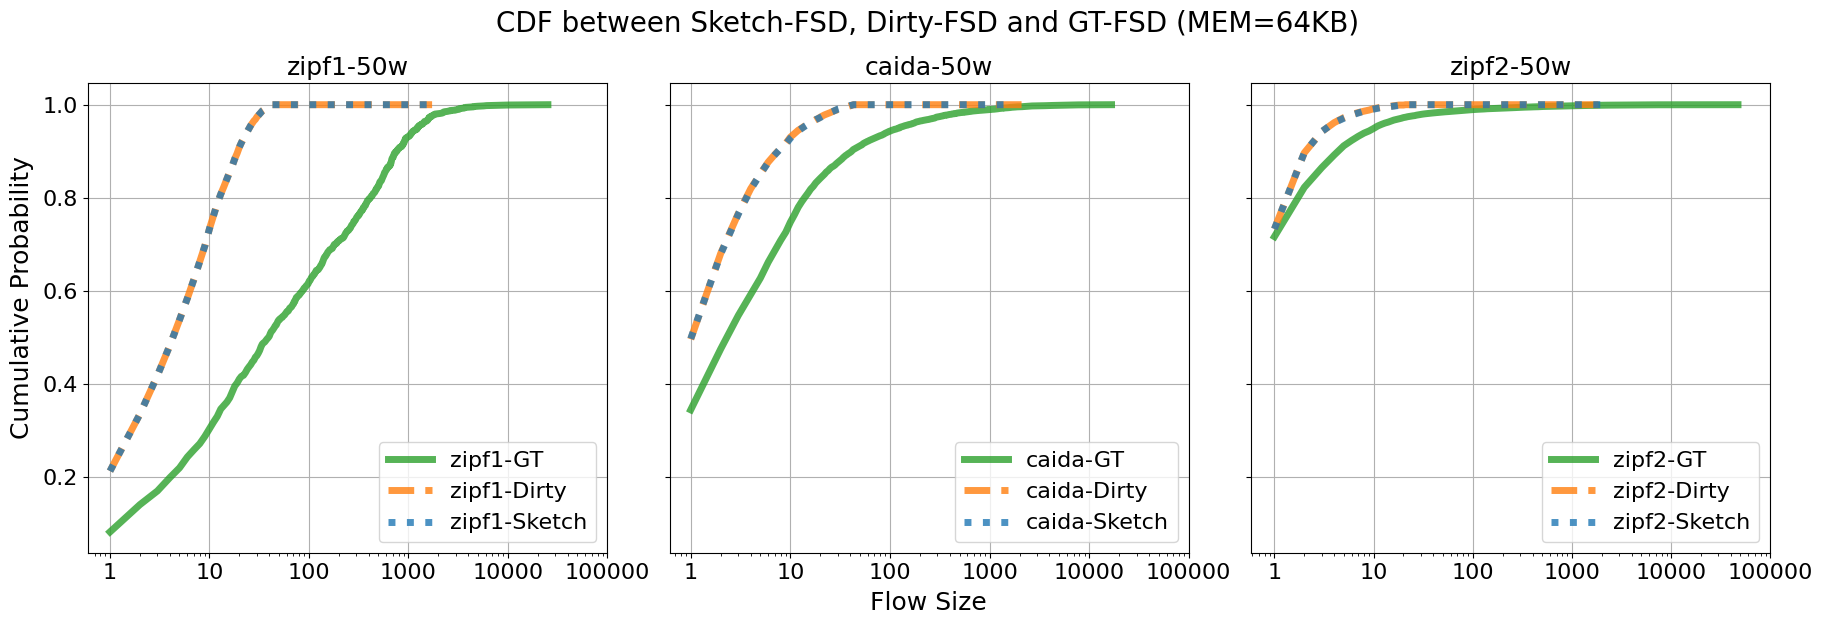

In [59]:
plot_dirty_fsd_with_diff_mem()

In [70]:
def plot_dirty_mrd_with_diff_mem(datasets, widths):
    
    testing_fsd = {}
    profiler_offline_avg_fsd = {}
        
    for w in widths:
        # prepare testing fsd
        testing_fsd[w] = {}
        testing_fsd[w] = prepare_testing_fsd_data(datasets=datasets, width=w)
            
        # prepare profiler offline avg fsd
        profiler_offline_avg_fsd[w] = {}
        profiler_offline_fsd = prepare_profiler_offline_fsd_data(datasets=datasets, width=w)
        for name, fsd_list in profiler_offline_fsd.items():
            profiler_offline_avg_fsd[w][name] = get_avg_fsd(fsd_list)
        
    # prepare testing gt avg fsd
    testing_fsd[0] = {}
    testing_fsd[0] = prepare_testing_gt_fsd_data(datasets=datasets, width=4096)
    # prepare profiler offline avg fsd
    profiler_offline_avg_fsd[0] = {}
    profiler_offline_fsd = prepare_profiler_offline_gt_fsd_data(datasets=datasets, width=4096)
    for name, fsd_list in profiler_offline_fsd.items():
        profiler_offline_avg_fsd[0][name] = get_avg_fsd(fsd_list)
    
    xticks = [f'{int(w*16/1024)}KB' for w in widths] + ['INF']
        
    MRDs = []
    # # cal by avg fsd
    # for d in datasets:
    #     single_MRDs = []
    #     for w in widths:
    #         single_MRDs.append(round(calculate_mrd(profiler_offline_avg_fsd[d[:-9]][w], testing_avg_fsd[d[:-9]][w]), 2))
    #     MRDs.append(single_MRDs)
        
    # cal by avg mrd
    for d in datasets:
        single_MRDs = []
        for w in widths:
            total_mrd = 0.0
            for fsd in testing_fsd[w][d[:-9]]:
                total_mrd += calculate_mrd(normalize_fsd(profiler_offline_avg_fsd[w][d[:-9]]), normalize_fsd(fsd))
            single_MRDs.append(round(total_mrd/len(testing_fsd[w][d[:-9]]), 2))
        # GT 
        total_mrd = 0.0
        for fsd in testing_fsd[0][d[:-9]]:
            total_mrd += calculate_mrd(normalize_fsd(profiler_offline_avg_fsd[0][d[:-9]]), normalize_fsd(fsd))
        single_MRDs.append(round(total_mrd/len(testing_fsd[0][d[:-9]]), 2))
        MRDs.append(single_MRDs)
        
    labels = list(testing_fsd[widths[0]].keys())
    
    colors = {'500w':'tab:red', '250w':'tab:green', '125w':'tab:orange', '50w':'tab:blue'}
    markers = {'500w':'o', '250w':'^', '125w':'s', '50w':'D'}
    legend_loc = ['lower left', 'upper right', 'upper right']
    data_range = [(7,10), (0,4), (4,7)] # zipf1 caida zipf2
    bar_width = 0.2
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    for i, ax in enumerate(axs):
        ax.set_title(f'{labels[data_range[i][0]].split("-")[0]}', fontsize=18)
        for j in range(data_range[i][0], data_range[i][1]):
        #     ax.plot(MRDs[j], label=labels[j], color=colors[labels[j].split("-")[1]], marker=markers[labels[j].split("-")[1]], linewidth=3, markersize=8)
        # ax.set_xticks(np.arange(len(xticks)))
            offset = (j - data_range[i][0]) * bar_width
            ax.bar(np.arange(len(xticks)) + offset, MRDs[j], width=bar_width, label=labels[j],
               color=colors[labels[j].split("-")[1]], edgecolor='black', zorder=3)
        ax.set_xticks(np.arange(len(xticks)) + bar_width * (len(range(data_range[i][0], data_range[i][1])) - 1) / 2)
        
        ax.set_xticklabels(xticks)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylim([0, 1.25])
        ax.legend(fontsize=16)
        ax.grid()
    
    fig.text(0.5, -0.02, 'Memory', ha='center', fontsize=18)
    fig.text(-0.01, 0.5, 'WMRD(DIST_sketch, DIST_gt)', va='center', rotation='vertical', fontsize=18)
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.suptitle('MRD Variation between Sketch-FSD and Dirty-FSD', fontsize=20)
    # plt.legend(ncol=1)
    
    plt.tight_layout()
    plt.show()  
    

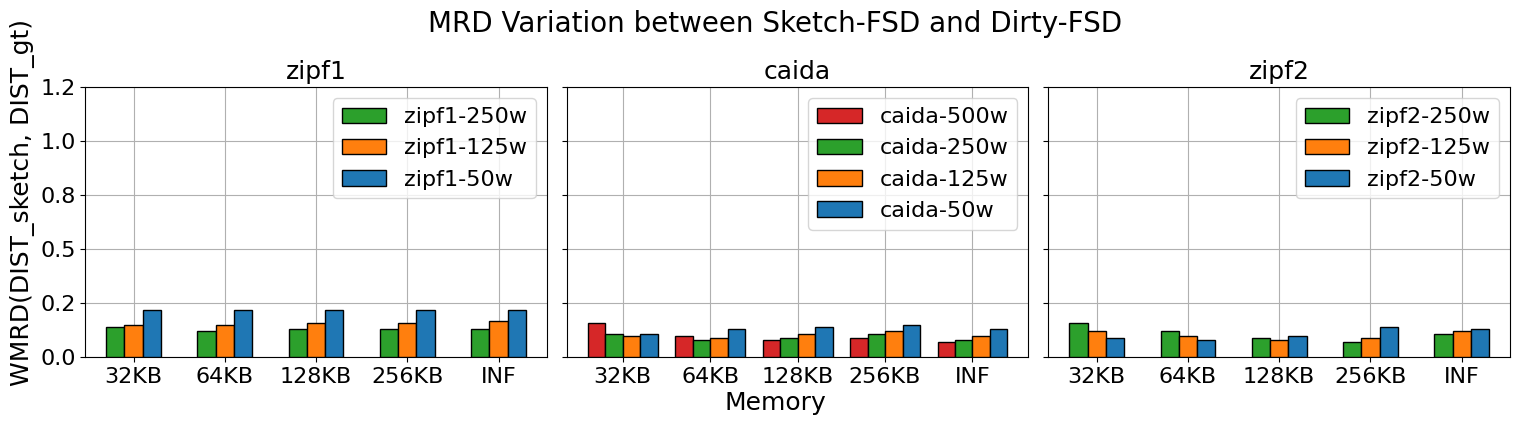

In [71]:
plot_dirty_mrd_with_diff_mem(datasets=pcap_file[:10], widths=[2048, 4096, 8192, 16384])

---

In [30]:
def plot_fsd(datasets, width, k):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    colors = {'caida':'tab:blue', 'zipf2':'tab:orange', 'zipf1':'tab:green'}
    
    # for d in datasets:
    #     file_path = pcap_folder + d[:-9] + '.txt'
    #     all_fsd[f'{d[:-9]}-GT'] = get_fsd_dict(file_path)
           
    for d in datasets:
        fsds = read_offline_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=d, window_size=200,k=k)
        # all_fsd[d[:-9]] = get_avg_fsd(fsds)
        all_fsd[d[:-9]] = get_sum_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    # linestyles = ['-.', '--', ':', '-', '--', ':', '-', '--', ':', '-']
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    if k == 0:
        plt.title(f'CDF of {int(width*16/1024)}KB (GT)')
    else:
        plt.title(f'CDF of {int(width*16/1024)}KB (Sample {k} flows)')
    # plt.title(f'CDF of GT')
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2, color=colors[labels[i].split("-")[0]])
        # plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2)
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=3)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim(0, 100000)
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    

In [32]:
# for w in [1024, 2048, 4096, 8192, 16384]:
#     plot_fsd(datasets=pcap_file[:10],width=w)

# for k in [1000, 5000, 8000, 0]:
#     plot_fsd(datasets=pcap_file[:10],width=4096, k=k)